In [3]:
import pandas as pd
from openpyxl import load_workbook
from openpyxl.styles import Font, Border, Side, Alignment, PatternFill
from typing import Dict, Any, Literal
import os
import numpy as np

# --- Constantes de Estilo ---
AZUL_RELLENO = PatternFill(start_color="00B0F0", end_color="00B0F0", fill_type="solid")
FUENTE_NEGRITA = Font(bold=True)
ALINEACION_CENTRO = Alignment(horizontal='center', vertical='center')
BORDE_FINO = Border(left=Side(style='thin'), right=Side(style='thin'),
                    top=Side(style='thin'), bottom=Side(style='thin'))

def aplicar_estilo_a_celda(cell: Any, styles: Dict[str, Any]):
    """Aplica un diccionario de estilos a una celda de openpyxl."""
    for attr, value in styles.items():
        setattr(cell, attr, value)

def limpiar_eliminar_total(input_path: str, output_path: str, total_label: Literal['TOTAL'] = 'TOTAL') -> pd.DataFrame:
    """
    Lee el archivo Excel y elimina SOLO las filas donde Cultivo es *exactamente* 'TOTAL' (o la etiqueta provista).

    Args:
        input_path: Ruta del archivo Excel de entrada.
        output_path: Ruta del archivo Excel de salida.
        total_label: La etiqueta exacta a eliminar, se compara con la versión en mayúsculas.

    Returns:
        DataFrame limpio.
    """
    df = pd.read_excel(input_path)
    print(f"Datos leídos de: {input_path}")

    # 🔑 PASO CLAVE: Filtrar y mantener solo las filas cuya columna Cultivo, en mayúsculas, NO sea igual a 'TOTAL'.
    df_limpio = df[df['Cultivo'].str.upper() != total_label].copy()

    # Guardar temporalmente para openpyxl
    df_limpio.to_excel(output_path, index=False, engine='openpyxl')
    print(f"Cultivos '{total_label}' eliminados. Guardado para formateo.")
    return df_limpio

def aplicar_estetica_y_guardar(df_limpio: pd.DataFrame, output_path: str):
    """
    Aplica la estética definida (negrita, azul, bordes, %) al archivo recién creado.
    """
    try:
        wb = load_workbook(output_path)
        ws = wb.active

        # Obtener el índice de la columna 'Valor' dinámicamente
        # Si la columna no se llama "Valor", esto fallará, por eso la obtenemos del DataFrame limpio
        try:
            valor_col_index = df_limpio.columns.get_loc('Valor') + 1
        except KeyError:
            valor_col_index = -1
            print("Advertencia: Columna 'Valor' no encontrada para añadir el (%).")

        # 3.1 Aplicar Estilos Globales a Encabezados (Fila 1)
        for col in ws.iter_cols(min_row=1, max_row=1):
            for cell in col:
                # Aplicar NEGRILA, RELLENO AZUL y bordes a TODOS los encabezados
                aplicar_estilo_a_celda(cell, {
                    'font': FUENTE_NEGRITA,
                    'fill': AZUL_RELLENO,
                    'alignment': ALINEACION_CENTRO,
                    'border': BORDE_FINO
                })

        # 3.2. Ajustar ancho de columna y aplicar bordes a los datos
        for col_idx, column in enumerate(ws.columns):
            max_length = 0
            column_letter = ws.cell(row=1, column=col_idx + 1).column_letter

            for cell_idx, cell in enumerate(column):
                cell_value_str = str(cell.value) if cell.value is not None else ""
                max_length = max(max_length, len(cell_value_str))

                # Aplicar bordes a todas las celdas
                cell.border = BORDE_FINO

                # Centrar los datos
                if cell_idx > 0:
                     cell.alignment = ALINEACION_CENTRO

            # 3.3. Establecer el ancho de columna
            adjusted_width = max(max_length + 2, 12)
            ws.column_dimensions[column_letter].width = adjusted_width

        # 🔑 PASO CRÍTICO: Modificar el encabezado 'Valor' DESPUÉS de todo el formateo.
        if valor_col_index != -1:
            valor_cell = ws.cell(row=1, column=valor_col_index)
            valor_cell.value = "Valor (%)"

        # 4. Guardar el libro de trabajo con los estilos aplicados
        wb.save(output_path)
        print(f"\n✅ ¡Éxito! El archivo 'Finalreto1.xlsx' ha sido limpiado y formateado en: {output_path}")

    except Exception as e:
        print(f"\n❌ Ocurrió un error al aplicar la estética: {e}")

if __name__ == '__main__':
    from google.colab import drive # Necesario para la ejecución final

    # Define las rutas
    INPUT_PATH = '/content/drive/MyDrive/Reto/1/Final/Partefinal1.xlsx'
    OUTPUT_DIR = '/content/drive/MyDrive/Reto/1/Final'
    OUTPUT_FILENAME = 'Finalreto1.xlsx'
    OUTPUT_PATH = os.path.join(OUTPUT_DIR, OUTPUT_FILENAME)

    # 1. Montar Drive (asumiendo que la función está disponible)
    # montar_drive()

    # 2. Ejecutar Limpieza
    try:
        df_limpio = limpiar_eliminar_total(INPUT_PATH, OUTPUT_PATH)

        # 3. Ejecutar Estética (solo si la limpieza fue exitosa)
        if df_limpio is not None:
             aplicar_estetica_y_guardar(df_limpio, OUTPUT_PATH)

    except Exception as e:
        print(f"\n❌ El proceso completo falló: {e}")

Datos leídos de: /content/drive/MyDrive/Reto/1/Final/Partefinal1.xlsx
Cultivos 'TOTAL' eliminados. Guardado para formateo.
Advertencia: Columna 'Valor' no encontrada para añadir el (%).

✅ ¡Éxito! El archivo 'Finalreto1.xlsx' ha sido limpiado y formateado en: /content/drive/MyDrive/Reto/1/Final/Finalreto1.xlsx


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Google Drive montado correctamente.
Base de datos leída de: /content/drive/MyDrive/Reto/1/Final/Finalreto1.xlsx

Ingrese el nombre exacto del cultivo a exportar: Piña
Datos filtrados guardados inicialmente en: /content/drive/MyDrive/Reto/1/Final/Cultivo_Piña.xlsx


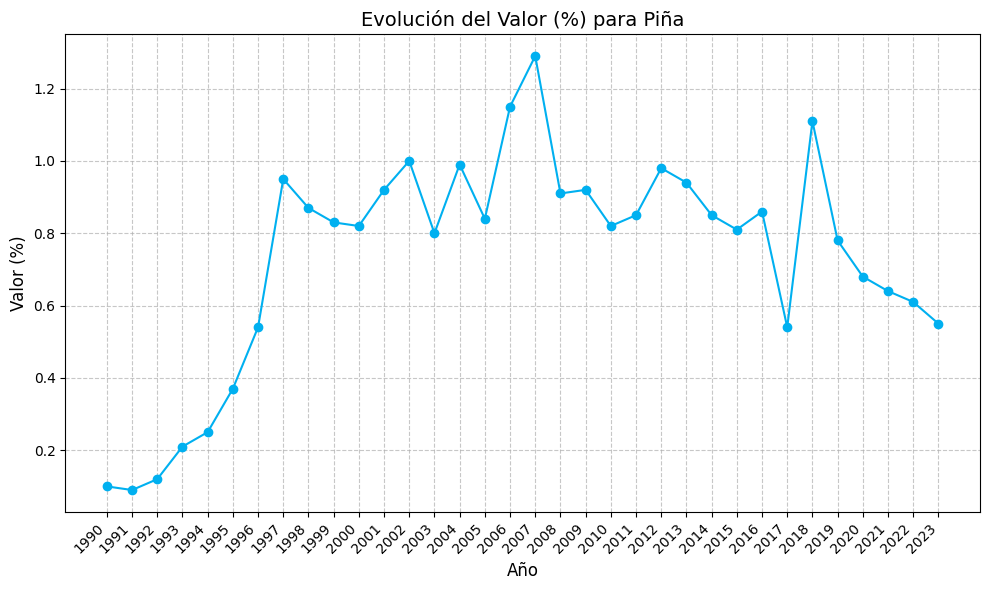

✅ Gráfico guardado en: /content/drive/MyDrive/Reto/1/Final/Grafico_Piña.png

✅ ¡Proceso Completo! Archivo Excel y Gráfico guardados en: /content/drive/MyDrive/Reto/1/Final


In [12]:
import pandas as pd
from openpyxl import load_workbook
from openpyxl.styles import Font, Border, Side, Alignment, PatternFill
from typing import Dict, Any
import os
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# --- Constantes de Estilo ---
AZUL_RELLENO = PatternFill(start_color="00B0F0", end_color="00B0F0", fill_type="solid")
FUENTE_NEGRITA = Font(bold=True)
ALINEACION_CENTRO = Alignment(horizontal='center', vertical='center')
BORDE_FINO = Border(left=Side(style='thin'), right=Side(style='thin'),
                    top=Side(style='thin'), bottom=Side(style='thin'))
COLUMNA_VALOR_ESTANDAR = 'Valor' # Nombre de la columna sin el símbolo de porcentaje

# --- Rutas de Archivos ---
INPUT_PATH = '/content/drive/MyDrive/Reto/1/Final/Finalreto1.xlsx'
OUTPUT_DIR = '/content/drive/MyDrive/Reto/1/Final'

# Se incluye el montaje de drive por si la celda se ejecuta sola
try:
    drive.mount('/content/drive')
    print("Google Drive montado correctamente.")
except Exception:
    pass

# --- Función Auxiliar ---
def aplicar_estilo_a_celda(cell: Any, styles: Dict[str, Any]):
    """Aplica un diccionario de estilos a una celda de openpyxl."""
    for attr, value in styles.items():
        setattr(cell, attr, value)

# --- FUNCIÓN PARA GENERAR GRÁFICO (MODIFICADA) ---
def generar_grafico(df_data: pd.DataFrame, nombre_cultivo: str, output_path: str):
    """
    Genera, muestra y guarda una gráfica de líneas del Valor a lo largo de los Años.
    """

    # 1. Asegurar que los datos sean numéricos y que los años sean el índice
    df_data = df_data.set_index('Año')

    # 2. Configurar la figura
    plt.figure(figsize=(10, 6))

    # 3. Crear el gráfico de líneas
    plt.plot(df_data.index, df_data['Valor (%)'], marker='o', linestyle='-', color='#00B0F0')

    # 4. Configurar etiquetas y título
    plt.title(f'Evolución del Valor (%) para {nombre_cultivo}', fontsize=14)
    plt.xlabel('Año', fontsize=12)
    plt.ylabel('Valor (%)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)

    # 5. Configurar el eje X para que muestre los años de manera legible
    # Se asegura que solo se muestren los años presentes en los datos
    plt.xticks(df_data.index, rotation=45, ha='right')
    plt.tight_layout()

    # 6. Guardar el gráfico
    plt.savefig(output_path)

    # 🔑 MODIFICACIÓN CLAVE: Mostrar el gráfico en la salida de Colab
    plt.show()

    plt.close() # Cerrar la figura para liberar memoria

    print(f"✅ Gráfico guardado en: {output_path}")

# --- FUNCIÓN PRINCIPAL (SIN CAMBIOS ESTRUCTURALES) ---
def filtrar_y_exportar_cultivo(input_path: str, output_dir: str):
    """
    Pide el nombre del cultivo, filtra el DataFrame, ordena por Año,
    exporta a Excel y genera el gráfico.
    """
    try:
        # 1. Lectura de Datos y Normalización Temporal de Encabezados
        df = pd.read_excel(input_path)
        print(f"Base de datos leída de: {input_path}")

        col_map = {}
        for col in df.columns:
            if 'VALOR' in col.upper() and '%' in col:
                col_map[col] = COLUMNA_VALOR_ESTANDAR
            else:
                col_map[col] = col.strip()

        df.rename(columns=col_map, inplace=True)

        # 1.1 Pedir el nombre del cultivo al usuario
        nombre_cultivo = input("\nIngrese el nombre exacto del cultivo a exportar: ")

        # --- 2. Filtrado y Ordenamiento ---
        cultivo_limpio = nombre_cultivo.strip()
        df_filtrado = df[df['Cultivo'].str.strip() == cultivo_limpio].copy()

        if df_filtrado.empty:
            print(f"\n❌ Advertencia: No se encontraron datos para el cultivo '{nombre_cultivo}'.")
            return

        df_filtrado.sort_values(by=['Año'], inplace=True)

        # --- 3. Generación de Archivo y Gráfico ---

        # Generar nombres de archivos
        output_filename_excel = f"Cultivo_{cultivo_limpio.replace(' ', '_').replace('(', '').replace(')', '')}.xlsx"
        output_filename_graph = f"Grafico_{cultivo_limpio.replace(' ', '_').replace('(', '').replace(')', '')}.png"
        output_path_excel = os.path.join(output_dir, output_filename_excel)
        output_path_graph = os.path.join(output_dir, output_filename_graph)

        # Antes de guardar, re-añadimos el encabezado 'Valor (%)' para la salida
        df_filtrado.rename(columns={COLUMNA_VALOR_ESTANDAR: 'Valor (%)'}, inplace=True)

        # 3.1 Guardar el Excel
        df_filtrado.to_excel(output_path_excel, index=False, engine='openpyxl')
        print(f"Datos filtrados guardados inicialmente en: {output_path_excel}")

        # 3.2 Generar el Gráfico (AQUÍ SE MUESTRA EN COLAB)
        generar_grafico(df_filtrado, nombre_cultivo, output_path_graph)

        # --- 4. Aplicación de Estilos (Conservación de Estética) ---
        wb = load_workbook(output_path_excel)
        ws = wb.active

        # Obtener el índice de la columna 'Valor (%)'
        valor_col_index = df_filtrado.columns.get_loc('Valor (%)') + 1

        # Aplicar Estilos Globales a Encabezados (Fila 1)
        for col in ws.iter_cols(min_row=1, max_row=1):
            for cell in col:
                aplicar_estilo_a_celda(cell, {
                    'font': FUENTE_NEGRITA,
                    'fill': AZUL_RELLENO,
                    'alignment': ALINEACION_CENTRO,
                    'border': BORDE_FINO
                })

        # Ajustar ancho de columna, bordes, y centrado de datos
        for col_idx, column in enumerate(ws.columns):
            max_length = 0
            column_letter = ws.cell(row=1, column=col_idx + 1).column_letter

            for cell_idx, cell in enumerate(column):
                cell_value_str = str(cell.value) if cell.value is not None else ""
                max_length = max(max_length, len(cell_value_str))
                cell.border = BORDE_FINO

                if cell_idx > 0:
                     cell.alignment = ALINEACION_CENTRO

            adjusted_width = max(max_length + 2, 12)
            ws.column_dimensions[column_letter].width = adjusted_width

        # 5. Guardar el archivo final con los estilos
        wb.save(output_path_excel)
        print(f"\n✅ ¡Proceso Completo! Archivo Excel y Gráfico guardados en: {output_dir}")

    except FileNotFoundError:
        print(f"\n❌ Error: El archivo base no se encontró en la ruta: {input_path}. Verifique el nombre del archivo.")
    except KeyError as e:
        print(f"\n❌ Error: Una columna necesaria no existe o el encabezado del valor no es el esperado. Detalle: {e}.")
    except Exception as e:
        print(f"\n❌ Ocurrió un error inesperado durante el procesamiento: {e}")

if __name__ == '__main__':
    filtrar_y_exportar_cultivo(INPUT_PATH, OUTPUT_DIR)